# Index analysis
- NDVI (Normalized Difference Vegetation Index)
	- 植生の健康状態や植生被覆率を把握できる
	- NDVI = (B8 - B4) / (B8 + B4)

- Narrow NDVI（Narrow Normalized Difference Vegetation Index）
	- NDVIと似ているが、B8Aを用いることでより特定の植生の状態を詳細に観測できる
	- Narrow NDVI = (B8A - B4) / (B8A + B4)

- EVI (Enhanced Vegetation Index)
	- 植生の鮮明度や健康状態をより強調して表示するために使用され、NDVIに比べて土壌の影響が少ない
	- EVI = 2.5 × (B8 - B4) / (B8 + 6 × B4 - 7.5 × B2 + 1)

- NDWI (Normalized Difference Water Index)
  - 植生の水分含有量を把握するために使用され、湿潤度の高い地域や農地を監視できる
  - NDWI = (B8 - B11) / (B8 - B11)

- SAVI (Soil Adjusted Vegetation Index)
  - 土壌の影響を調整し、植生が疎らな場所でも有効
  - SAVI = ((1 + L)(B8 - B4)) / (B8 + B4 + L)
  - Lは補正係数、通常0.5使用

- GNDVI (Green Normalized Difference Vegetation Index)
  - 植物のクロロフィル濃度に敏感で、特に農作物の健康状態の評価に利用できる
  - GNDVI = (B8 - B3) / (B8 + B3)

- MSI（Moisture Stress Index）
  - 植生の水分ストレス状態を評価できる
  - MSI = B11 / B8A

- VARI（Visible Atmospherically Resistant Index）
  - 可視域のバンドのみを使用し、大気の影響を受けにくくするために考案された植生インデックス。特に都市部や農地の植生の検出に役立つ
  - VARI = (B3 - B4) / (B3 + B4 - B2)
- GBNDVI（Green-Blue Normalized Difference Vegetation Index）
  - 可視域のGreenとBlueバンドを使用し、植生のクロロフィル含有量を反映するインデックスです。農作物の健康状態や植生の活力の評価に適している
  - GBNDVI = (B3 - B2) / (B3 - B2)

- RGBVI（Red-Green-Blue Vegetation Index）
  - RGBすべてのバンドを使用して、植生の状態を可視化するインデックスです。可視域のみで植物の健康状態を確認できる
  - RGBVI = (B4 × B3 - B2^2) / (B4 × B3 + B2^2)

- TGI（Triangular Greenness Index）
  - クロロフィル含有量を推定するために使われるインデックスで、農作物の成長段階の観測やストレス検出に利用される
  - TGI = B3 - 0.39 × B4 - 0.61 × B2

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.ndimage import zoom



In [3]:
# tif to numpy
def SaveImageAsNumpy(image_dir, output_dir, filename):
		img = Image.open(image_dir + filename + ".tif")
		img_array = np.array(img)
		np.save(output_dir + filename + ".npy", img_array)

image_dir = "../img/"
output_dir = "../data/"
filelist =glob.glob(image_dir + "*.tif")
for filename in filelist:
	SaveImageAsNumpy(image_dir, output_dir, filename.replace(".tif", "").replace(image_dir, ""))

/home/saiga/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [4]:
# read numpy
data_dir = "../data/"
B2 = np.load(data_dir + "T21JUL_20240719T135701_B02_10m.npy")
B3 = np.load(data_dir + "T21JUL_20240719T135701_B03_10m.npy")
B4 = np.load(data_dir + "T21JUL_20240719T135701_B04_10m.npy")
B8 = np.load(data_dir + "T21JUL_20240719T135701_B08_10m.npy")
B8A = np.load(data_dir + "T21JUL_20240719T135701_B8A_20m.npy")
B11 = np.load(data_dir + "T21JUL_20240719T135701_B11_20m.npy")
TCI = np.load(data_dir + "T21JUL_20240719T135701_TCI_10m.npy")

# ファイルサイズを合わせる
B8A = zoom(B8A, (2.0, 2.0), order=0)  # order=0 は最近傍補間
B11 = zoom(B11, (2.0, 2.0), order=0)  # order=0 は最近傍補間


/tmp/ipykernel_4569/3940681242.py:2: RuntimeWarning: invalid value encountered in divide
  NDVI = (B8 - B4) / (B8 + B4)


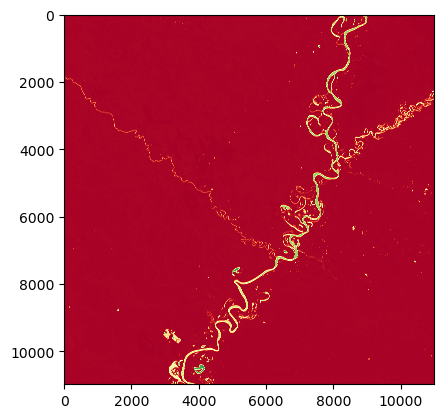

In [5]:
# NDVI = (B8 - B4) / (B8 + B4)
NDVI = (B8 - B4) / (B8 + B4)

# plot
plt.figure()
plt.imshow(NDVI, cmap='RdYlGn')

In [ ]:
# Narrow NDVI = (B8A - B4) / (B8A + B4)
Narrow_NDVI = (B8A - B4) / (B8A + B4)
# plot
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(Narrow_NDVI, cmap='RdYlGn')
plt.title("Narrow NDVI")

# 比較用
plt.subplot(1, 2, 2)
# plt.imshow(B8A - B4, cmap='RdYlGn')
plt.imshow(Narrow_NDVI - NDVI, cmap='RdYlGn')
plt.title("Narrow NDVI - NDVI")

/tmp/ipykernel_4569/3080691711.py:2: RuntimeWarning: invalid value encountered in divide
  Narrow_NDVI = (B8A - B4) / (B8A + B4)
